<div class="h1">Machine Learning Exam - Exercise 3</div> <a name="top"></a>
<div class="lead">PBA in Software Development, Business Academy Aarhus<br><small>Niels Wadsholt, May 2018</small></div>

<div class="h3">Table of contents</div> <a name="table-of-content"></a>
1. [A. Finding patterns in the Iris dataset with PCA and k-means](#Part-A)
2. [B. Image recognision with PCA and SVM](#Part-B)

## Disclaimer!
This exercise was finished last and in a rush and is this exam hand-in's equivalent to <a href="https://twitter.com/nijfranck/status/977277874460938242">this horse's head.</a>

## A. Finding patterns in the Iris dataset with PCA and k-means<a name="Part-A"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
With *principal component analysis*, a dataset can be reduced to a manageable number of dimensions while preserving its essential characteristics, which can be useful for speeding up a slow algorithm or for data visualization.

In this exercise, we will apply this tecnique to the famous Iris dataset.

We will then proceed to apply *unsupervised learning* on the data using the *k-means* clustering algorithm.

First, let's load the data and have a look at it:

In [430]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

iris = datasets.load_iris()

There are four input feature columns and one labelled output column (target):

In [431]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [432]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [433]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Next, we load the data into pandas dataframes and set the column headers:

In [434]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

type(x)

pandas.core.frame.DataFrame

Plotting the data:

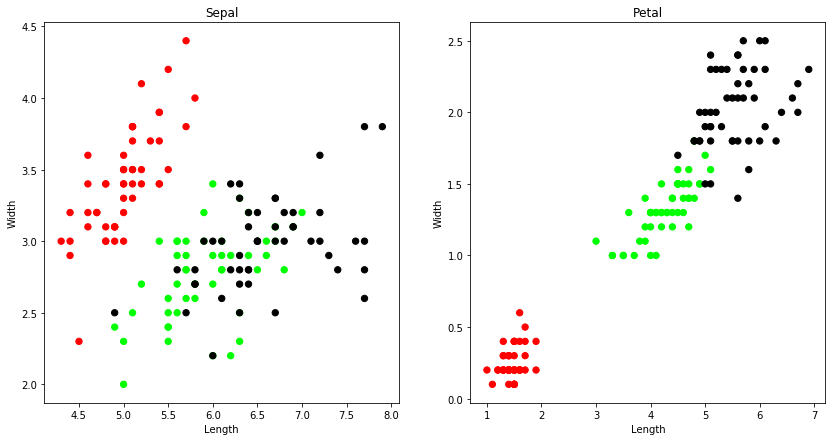

In [435]:
colormap = np.array(['red', 'lime', 'black', 'blue', 'yellow', 'green', 'red', 'magenta'])
plt.figure(figsize=(14,7))

# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')

plt.xlabel('Length')
plt.ylabel('Width')

# Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

plt.xlabel('Length')
plt.ylabel('Width')

plt.show()

We then divide the dataset into petal and sepal and apply k-means clustering with `k=2` to the petal set:

In [436]:
x_sepal = x[['Sepal_Length','Sepal_Width']]
x_petal = x[['Petal_Length','Petal_Width']]

kmeans = KMeans(n_clusters=2, random_state=0).fit(x_petal)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

clusters

array([[1.49411765, 0.26078431],
       [4.92525253, 1.68181818]])

... and plot the result vs. the actual y-values:

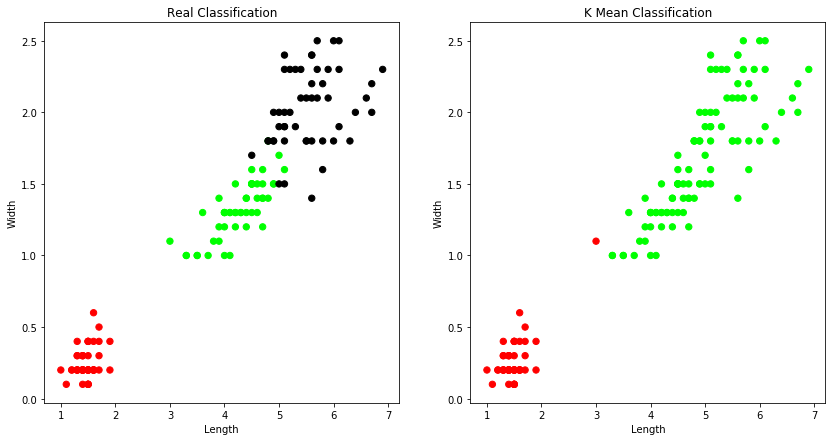

In [437]:
plt.figure(figsize=(14,7))

# Original Classification
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.xlabel('Length')
plt.ylabel('Width')
 
# Model Classification
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)
plt.title('K Mean Classification')

plt.xlabel('Length')
plt.ylabel('Width')

plt.show()

... and try the same with `k=3`, `k=4` and `k=4`:

In [438]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_petal)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

clusters

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

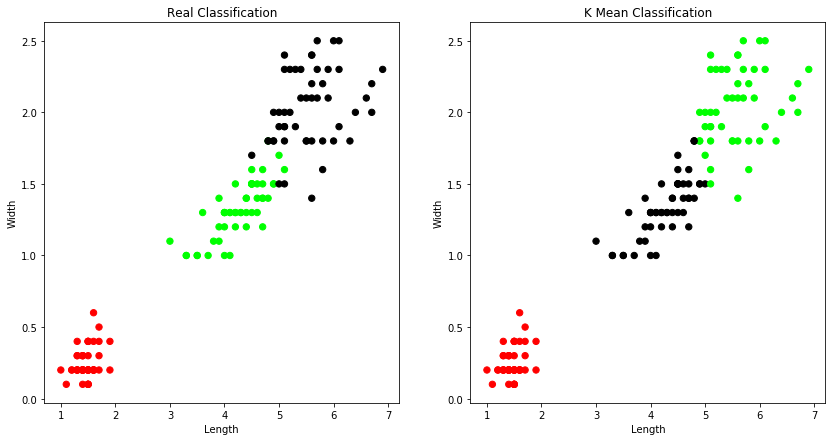

In [439]:
plt.figure(figsize=(14,7))

# Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.xlabel('Length')
plt.ylabel('Width')
 
# Model Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)
plt.title('K Mean Classification')

plt.xlabel('Length')
plt.ylabel('Width')

plt.show()

In [440]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_petal)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

clusters

array([[4.75789474, 1.59736842],
       [1.464     , 0.244     ],
       [5.78611111, 2.10833333],
       [3.90384615, 1.19230769]])

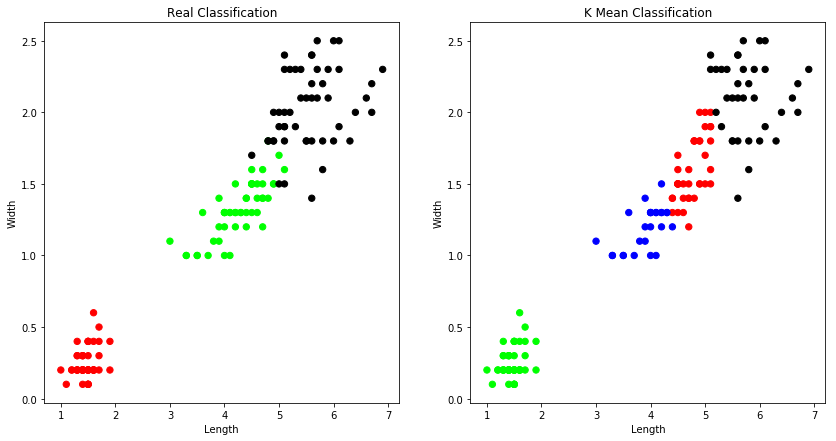

In [441]:
plt.figure(figsize=(14,7))

# Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.xlabel('Length')
plt.ylabel('Width')
 
# Model Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)
plt.title('K Mean Classification')

plt.xlabel('Length')
plt.ylabel('Width')

plt.show()

In [442]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(x_petal)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

clusters

array([[1.464     , 0.244     ],
       [4.64857143, 1.5       ],
       [6.28461538, 2.13846154],
       [3.83181818, 1.16818182],
       [5.39666667, 2.05333333]])

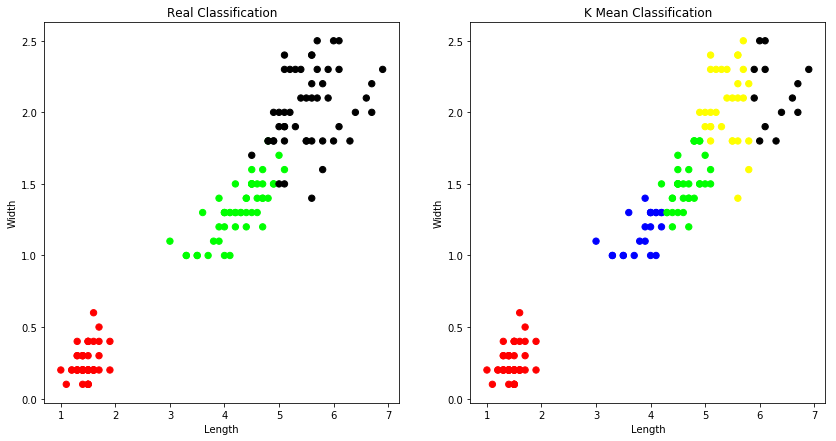

In [443]:
plt.figure(figsize=(14,7))

# Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.xlabel('Length')
plt.ylabel('Width')
 
# Model Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)
plt.title('K Mean Classification')

plt.xlabel('Length')
plt.ylabel('Width')

plt.show()

### A.1 Applying PCA
Next, we apply dimensionality reduction with PCA to the original dataset, cutting the four feature dimensions down to two:

In [444]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [445]:
X, y = iris.data, iris.target
X_proj = pca.fit_transform(X)

X_proj.shape

(150, 2)

Result: 150 data points in two dimensions. We can now vizualize the whole dataset:

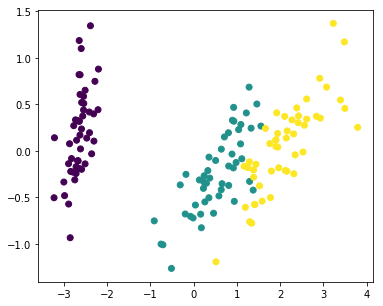

In [446]:
plt.figure(figsize=(6,5))
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)

plt.show()

In [447]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [448]:
pca.components_.shape

(2, 4)

Looking at the explained variance ratio, which reveals which percentage of the variance that can be attributed to each component, we see a noticable difference:

In [449]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

Together, they amount to

In [450]:
(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100

97.76317750248033

percent, so there is a loss of a little over 2 percent.

### A.2 Applying k-means
Time to apply k-means clustering and see how it fares on the reduced data set:

In [451]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_proj)  
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

clusters

array([[-2.64084076,  0.19051995],
       [ 2.34645113,  0.27235455],
       [ 0.66443351, -0.33029221]])

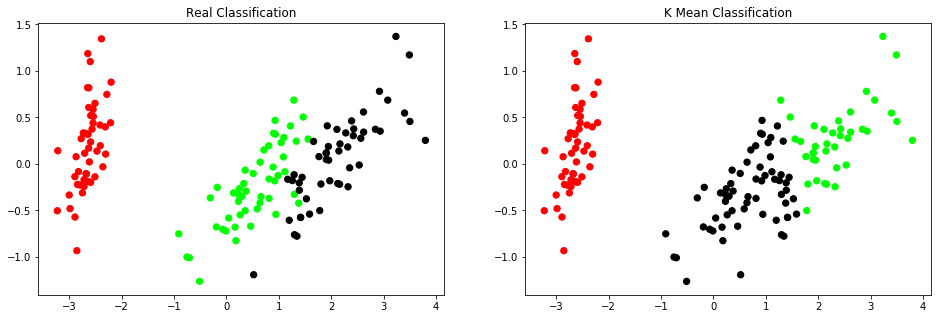

In [452]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(X_proj[:,0], X_proj[:,1], c=colormap[y], s=40)
plt.title('Real Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(X_proj[:,0], X_proj[:,1], c=colormap[labels], s=40)
plt.title('K Mean Classification')

plt.show();

Well, it was not too far off, but still could be better.

So how many clusters can we potentially find in this dimensionality-reduced data? Of course, k-means will divide the data into however many clusters we tell it to, but the size of the colormap is currently a limitation.

If it would make sense to do so is another question. If the goal is to match the real classification, the number is of course 3. That is the range of values the output can take on, and that hasn't changed by reducing the number of input features.

Side note: If only plt.scatter accepted an iterator as colormap, we could just define colors like this:
>`colormap = itertools.cycle('rbmcgyk')`

which would allow us to cycle indefinitely through a range of colors.

In [453]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_proj)  
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

clusters

array([[-2.78123098, -0.20587391],
       [ 0.91968246,  0.08764898],
       [ 3.17937563,  0.65489073],
       [ 2.12266699,  0.13018292],
       [ 0.03297307, -0.59939848],
       [-2.52124909,  0.5281888 ],
       [ 1.3596994 , -0.41706022]])

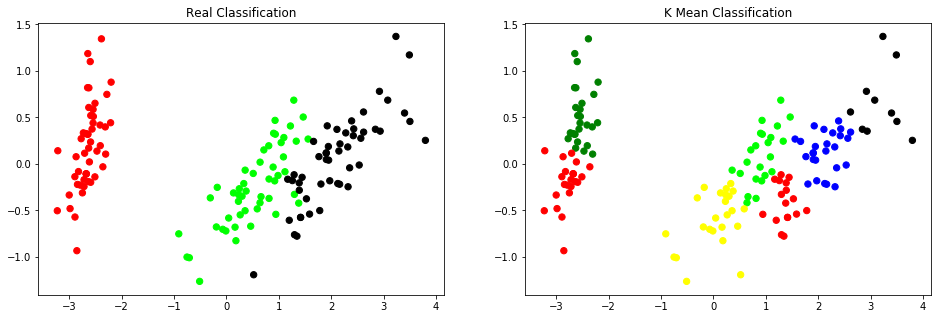

In [454]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(X_proj[:,0], X_proj[:,1], c=colormap[y], s=40)
plt.title('Real Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(X_proj[:,0], X_proj[:,1], c=colormap[labels], s=40)
plt.title('K Mean Classification')

plt.show();

## B. Image recognision with PCA and SVM<a name="Part-B"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
The one limitation to our computational abilities that overshadows everything else is processing speed. It is what makes chryptographic hash functions secure, but it is also what for many years stalled the progress in machine learning.

Only recently have cpu's - and, importantly, gpu's - reached a speed that enables training deep neural networks on huge data sets.

Anything that can help with speed is therefore of great value, and PCA is such a thing.

As the time complexity for iterating over an $m$-dimensional matrix of data points with a range of $n$ along each axis is $n^m$, a reduction of even just one dimension can have a huge impact on peformance. This is of course *especially* true for datasets where both $m$ and $n$ are large.

### B.1 The 'Olivetti faces' dataset
The Olivetti dataset contains 10 images of each of 40 distinct subjects taken at different times with varying lightning, facial expressions etc.

In [455]:
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
import numpy as np

faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

Each image take up 4096 / 256 = 16All values have been scaled to floating point values between 0 and 1:

In [456]:
faces.data[:5]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       [0.1983471 , 0.19421488, 0.19421488, ..., 0.75206614, 0.75206614,
        0.73966944],
       [0.5       , 0.54545456, 0.58264464, ..., 0.17768595, 0.17355372,
        0.17355372]], dtype=float32)

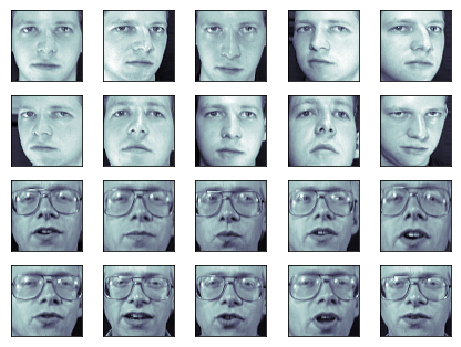

In [457]:
fig = plt.figure(figsize=(8, 6))

for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [458]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)

X_train.shape, X_test.shape

((300, 4096), (100, 4096))

In [459]:
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

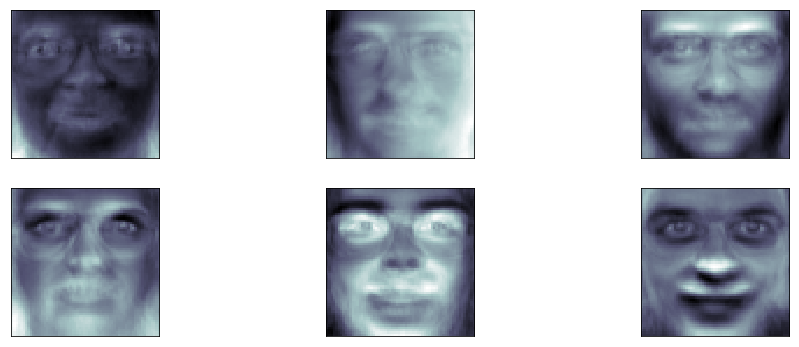

In [460]:
fig = plt.figure(figsize=(16, 6))

for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

In [461]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print (X_train_pca.shape)
print (X_test_pca.shape)

(300, 150)
(100, 150)


In [462]:
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Introduced a small change to quickly allow generation of an n*n image matrix:

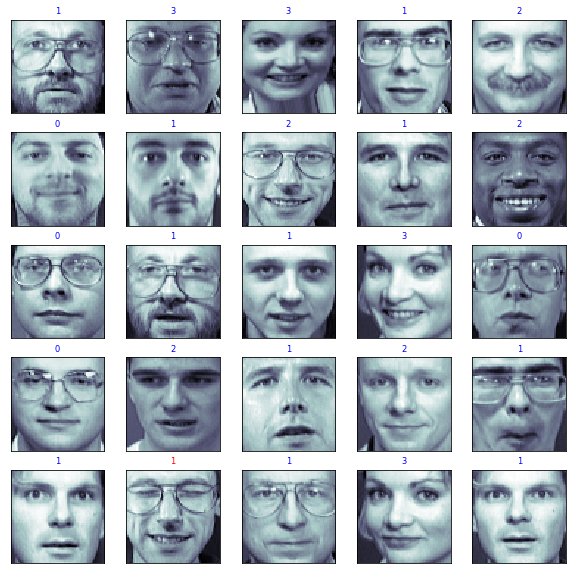

In [463]:
n = 5
s = 2

fig = plt.figure(figsize=(n*s, n*s))

for i in range(n**2):
    ax = fig.add_subplot(n, n, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('blue' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred], fontsize='small', color=color)

In [464]:
from sklearn import metrics

y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         6
          1       1.00      1.00      1.00         4
          2       0.50      1.00      0.67         2
          3       1.00      1.00      1.00         1
          4       0.50      1.00      0.67         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       0.67      1.00      0.80         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19       1.00      1.00      1.00         4
         20       1.00      1.00      1.00   

Possible improvements:
- As the dataset is quite large, we might decrease the test size
- Vary the penalty parameter C